<div style="background-color: #1DA1F2; padding: 20px;"><b><h1> Descifrando el lenguaje emocional en Twitter: Un análisis predictivo basado en aprendizaje automático. </h1></b></div>

**Autor**: Neivys Luz González Gómez

La identificación de emociones es una tarea fundamental en el campo del procesamiento de lenguaje natural, que se enfoca en clasificar textos según su tono emocional. A pesar de que el objetivo es identificar una amplia variedad de emociones humanas, la mayoría de los conjuntos de datos disponibles se limitan a las polaridades positiva, negativa y, en ocasiones, neutral.

Detectar emociones a partir de textos es un reto complejo en el procesamiento del lenguaje natural, ya que se trata de un problema de clasificación multiclase y, en muchas ocasiones, no hay suficientes datos etiquetados disponibles. Sin embargo, este conjunto de datos etiquetado proporciona la oportunidad de aplicar diversas técnicas de análisis exploratorio y modelado para entender mejor la dinámica emocional en las redes sociales y mejorar la capacidad de detección en tiempo real.

El conjunto de datos de emociones se obtiene a partir de mensajes en inglés de Twitter y contiene seis emociones básicas: neutralidad, preocupación, felicidad, tristeza, amor, sorpresa, diversión, alivio, odio, vacío, entusiasmo y aburrimiento. Este conjunto de datos ofrece una variedad más amplia de emociones humanas, lo que permite el entrenamiento y la evaluación de modelos de análisis de sentimientos con mayor precisión y exhaustividad.

<div class="alert alert-info alert-info"><b><h3>Objetivo General</h3></b>
    
**Desarrollar un modelo que permita detectar emociones en los tweets y analizar patrones en el lenguaje utilizado en Twitter para ayudar en la detección temprana de trastornos emocionales como la depresión, la ansiedad, entre otros.**
</div>

---

# Notebook N° 3: Modelaje con Machine Learning 

El Notebook N° 3: Modelaje con Machine Learning tiene como objetivo brindar una comprensión clara y práctica de cómo aplicar técnicas de Machine Learning para construir modelos predictivos precisos. El proyecto se enfoca en la construcción, entrenamiento y evaluación de diferentes modelos para seleccionar el mejor modelo para los datos en cuestión.

<div class="alert alert-block alert-warning">
<b><h1>Descripción de las Variables</h1></b> 
</div>

Se dispone de un conjunto de datos proveniente de data.world, una plataforma que proporciona acceso a conjuntos de datos públicos. Este dataset consiste en una colección de tweets etiquetados con la emoción que expresan. Contiene cuatro columnas que incluyen el identificador del tweet, el sentimiento expresado, el autor y el contenido del tweet. En total, se tienen 40,000 registros con anotaciones para 13 emociones distintas. 

| Variables 	|                           Descripción                           	|
|:---------:	|:---------------------------------------------------------------:	|
|  tweet_id 	| Identificador numérico único asignado a cada registro de tweet  	|
| sentiment 	|   Clasifica cada tweet en una de las 13 diferentes emociones.   	|
|   author  	|       Nombre del usuario de Twitter que publicó el tweet.       	|
|  content  	|                   El texto completo del tweet                   	|

---

In [1]:
#import libraries
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from bs4 import BeautifulSoup
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

import re
import string

#import NLTK
import nltk
nltk.download('punkt') #Punkt es una biblioteca que se utiliza para tokenizar frases en lenguaje natural
nltk.download('stopwords') # library "stopwords"
nltk.download('wordnet') # 
nltk.download('omw-1.4') #
nltk.download('averaged_perceptron_tagger')


from nltk.tokenize import word_tokenize
from nltk.tokenize import sent_tokenize
from nltk.stem.wordnet import WordNetLemmatizer

#import librerias de frecuencias
from nltk.probability import FreqDist

#import librerias de pre-procesamiento y normalizacion
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.corpus import wordnet
from nltk.tag import pos_tag

#Librerias de pipeline
from sklearn.pipeline import Pipeline, FeatureUnion
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.preprocessing import FunctionTransformer, LabelEncoder, StandardScaler
from sklearn.impute import SimpleImputer


from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

import warnings
warnings.filterwarnings('ignore')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Lenovo\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Lenovo\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Lenovo\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\Lenovo\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\Lenovo\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


In [2]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.model_selection import GridSearchCV, RepeatedStratifiedKFold
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder, StandardScaler, RobustScaler, MinMaxScaler, LabelBinarizer, OrdinalEncoder
from sklearn.preprocessing import Binarizer
import sklearn.preprocessing as preprocessing
from sklearn.model_selection import train_test_split

from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier

---

<div class="alert alert-block alert-info">
<b><h2> Cargar Dataset.</h2></b> 
</div>

In [3]:
emotion_data= pd.read_csv('text_emotion.csv')

In [4]:
emotion_data

,tweet_id,sentiment,author,content
0,1956967341,empty,xoshayzers,@tiffanylue i know i was listenin to bad habi...
1,1956967666,sadness,wannamama,Layin n bed with a headache ughhhh...waitin o...
2,1956967696,sadness,coolfunky,Funeral ceremony...gloomy friday...
3,1956967789,enthusiasm,czareaquino,wants to hang out with friends SOON!
4,1956968416,neutral,xkilljoyx,@dannycastillo We want to trade with someone w...
...,...,...,...,...
39995,1753918954,neutral,showMe_Heaven,@JohnLloydTaylor
39996,1753919001,love,drapeaux,Happy Mothers Day All my love
39997,1753919005,love,JenniRox,Happy Mother's Day to all the mommies out ther...
39998,1753919043,happiness,ipdaman1,@niariley WASSUP BEAUTIFUL!!! FOLLOW ME!! PEE...


## 1. Preparación del Dataset

In [5]:
emotion_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40000 entries, 0 to 39999
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   tweet_id   40000 non-null  int64 
 1   sentiment  40000 non-null  object
 2   author     40000 non-null  object
 3   content    40000 non-null  object
dtypes: int64(1), object(3)
memory usage: 1.2+ MB


### 1.1 Verificar nulos y NaM

In [6]:
emotion_data.isnull().sum()

tweet_id     0
sentiment    0
author       0
content      0
dtype: int64

In [7]:
emotion_data.isna().sum()

tweet_id     0
sentiment    0
author       0
content      0
dtype: int64

* Como se pueden observar no hay valores faltantes ni NAN en el dataset. Se realiza una gráfica msno, la cual es una manera visual de verificar la distribucción de los valores faltantes en un dataset. 

### 1.2 Verificar datos duplicados

In [8]:
emotion_data[emotion_data.duplicated()]

,tweet_id,sentiment,author,content


<h3>Observaciones:</h3>

   *  Se puede observar que el data set no tiene valores nulos o NaN. 
   *  Se puede observar que el data set no tiene valores duplicados.  
   *  Las variables de importancia para el estudio son del tipo objeto. 
   *  El dataset posee 40000 filas y 4 columnas.

## 2. Descripción estadística y visualización global de las variables.

In [9]:
emotion_data.describe(include = 'object').T

,count,unique,top,freq
sentiment,40000,13,neutral,8638
author,40000,33871,MissxMarisa,23
content,40000,39827,I just received a mothers day card from my lov...,14


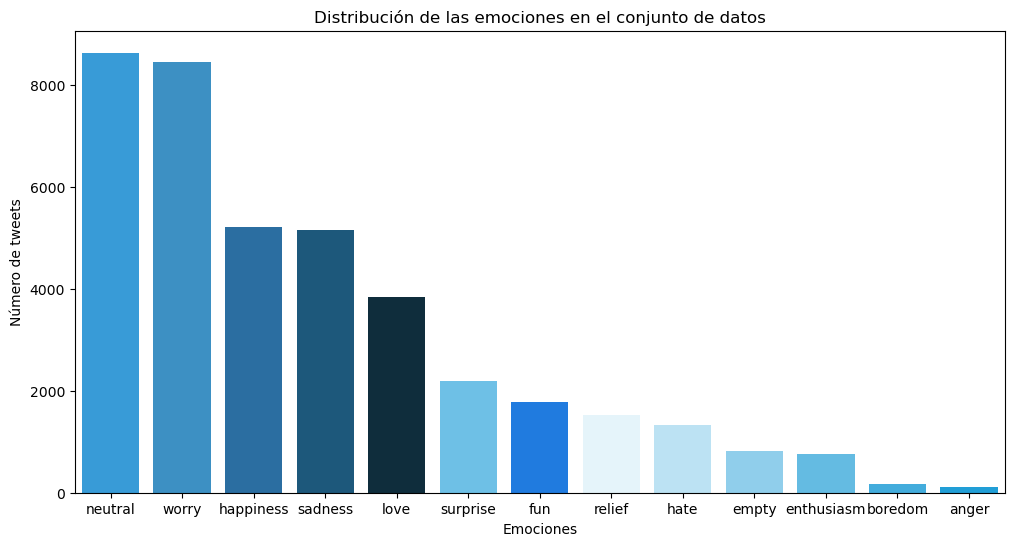

In [10]:
# Crear un colormap de azules de Twitter
cmap = sns.color_palette(['#1DA1F2', '#2795D9', '#1771B5', '#0D5C8B', '#073044', '#5AC8FA', '#007AFF', '#E1F5FE', '#B3E5FC', 
                          '#81D4FA', '#4FC3F7', '#29B6F6', '#03A9F4'])


# Contar el número de tweets por emoción
emotions_count = emotion_data['sentiment'].value_counts()

# Visualizar la distribución de las emociones
plt.figure(figsize=(12,6))
sns.barplot(x=emotions_count.index, y=emotions_count.values, palette=sns.color_palette(cmap))
plt.title('Distribución de las emociones en el conjunto de datos')
plt.xlabel('Emociones')
plt.ylabel('Número de tweets')

plt.show()

## 3. Pre-procesamiento de los datos

### 3.1 Pre-procesamiento del texto.

In [11]:
def preprocess_tweet(tweet):
    # Eliminar menciones (@nombredeusuario) y URLs
    pat1 = r'@[A-Za-z0-9]+'
    pat2 = r'https?://[A-Za-z0-9./]+'
    combined_pat = r'|'.join((pat1, pat2))
    soup = BeautifulSoup(tweet, 'lxml')
    souped = soup.get_text()
    stripped = re.sub(combined_pat, '', souped)
    try:
        clean = stripped.decode("utf-8-sig").replace(u"\ufffd", "?")
    except:
        clean = stripped

    
    # Convertir el texto a minúsculas
    tweet = clean.lower()
    
    # Eliminar signos de puntuación
    tweet = re.sub('[%s]' % re.escape(string.punctuation), '', tweet)
    
    # Eliminar números
    tweet = re.sub(r'\d+', '', tweet)
    
    # Eliminar palabras comunes (stopwords)
    stop_words = set(stopwords.words('english')).union(set(['u', 'im', 'c', 'n']))
    words = tweet.split()
    words = [word for word in words if not word in stop_words]   
    
    # Lematización (reducir las palabras a su raíz)
    lemmatizer = WordNetLemmatizer()
    words = [lemmatizer.lemmatize(word) for word in words]
    tweet = ' '.join(words)
    
    return tweet      

In [12]:
emotion_data['content']=emotion_data['content'].apply(preprocess_tweet)
emotion_data.head()

,tweet_id,sentiment,author,content
0,1956967341,empty,xoshayzers,know listenin bad habit earlier started freaki...
1,1956967666,sadness,wannamama,layin bed headache ughhhhwaitin call
2,1956967696,sadness,coolfunky,funeral ceremonygloomy friday
3,1956967789,enthusiasm,czareaquino,want hang friend soon
4,1956968416,neutral,xkilljoyx,want trade someone houston ticket one


### 3.2  Pre-procesamiento de los datos.

In [13]:
def convert_to_string(data):
    data['content'] = data['content'].astype(str)
    return data

In [14]:
convert_to_string(emotion_data)
emotion_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40000 entries, 0 to 39999
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   tweet_id   40000 non-null  int64 
 1   sentiment  40000 non-null  object
 2   author     40000 non-null  object
 3   content    40000 non-null  object
dtypes: int64(1), object(3)
memory usage: 1.2+ MB


In [15]:
print(emotion_data.applymap(type)['content'].value_counts())

<class 'str'>    40000
Name: content, dtype: int64


In [16]:
# Elimina columnas innecesarias
def remove_empty_tweets(data):
    return data[data['content'].apply(lambda x: len(x.strip()) != 0)]  

In [17]:
remove_empty_tweets(emotion_data)
emotion_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40000 entries, 0 to 39999
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   tweet_id   40000 non-null  int64 
 1   sentiment  40000 non-null  object
 2   author     40000 non-null  object
 3   content    40000 non-null  object
dtypes: int64(1), object(3)
memory usage: 1.2+ MB


In [18]:
# Elimina columnas innecesarias
def drop_columns(data):
    return data.drop(['tweet_id', 'author'], axis=1) 

In [19]:
emotion_data = drop_columns(emotion_data)
emotion_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40000 entries, 0 to 39999
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   sentiment  40000 non-null  object
 1   content    40000 non-null  object
dtypes: object(2)
memory usage: 625.1+ KB


### 3.3 Label encoder

In [20]:
def label_encoder(data):
    le = LabelEncoder()
    data['sentiment'] = le.fit_transform(data['sentiment'])
    return data 

In [21]:
label_encoder(emotion_data)
emotion_data.head()

,sentiment,content
0,2,know listenin bad habit earlier started freaki...
1,10,layin bed headache ughhhhwaitin call
2,10,funeral ceremonygloomy friday
3,3,want hang friend soon
4,8,want trade someone houston ticket one


In [22]:
emotion_data['sentiment'].value_counts()

8     8638
12    8459
5     5209
10    5165
7     3842
11    2187
4     1776
9     1526
6     1323
2      827
3      759
1      179
0      110
Name: sentiment, dtype: int64

## 4 Extraccion de Caracteristicas

### 4.1 Se define el target y la feature

In [23]:
# Se define el target y la feature
X = emotion_data['content']
y = emotion_data['sentiment']

In [24]:
y.value_counts()

8     8638
12    8459
5     5209
10    5165
7     3842
11    2187
4     1776
9     1526
6     1323
2      827
3      759
1      179
0      110
Name: sentiment, dtype: int64

In [25]:
X.head()

0    know listenin bad habit earlier started freaki...
1                 layin bed headache ughhhhwaitin call
2                        funeral ceremonygloomy friday
3                                want hang friend soon
4                want trade someone houston ticket one
Name: content, dtype: object

In [26]:
X.info()

<class 'pandas.core.series.Series'>
RangeIndex: 40000 entries, 0 to 39999
Series name: content
Non-Null Count  Dtype 
--------------  ----- 
40000 non-null  object
dtypes: object(1)
memory usage: 312.6+ KB


In [27]:
# Separamos los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [28]:
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

X_train shape: (32000,)
X_test shape: (8000,)
y_train shape: (32000,)
y_test shape: (8000,)


### Vectorización

En la actualidad, contamos con cada texto registrado en formato de cadena, lo cual no es útil para nuestros modelos. Para poder trabajar con ellos, debemos transformar cada registro en un vector. Para ello, se utilizara uno de los enfoques principales basados en el modelo de bolsa de palabras.

El CountVectorizer, que se enfoca en la frecuencia de cada palabra en el texto. 

* **CountVectorizer**

El modelo CountVectorizer se puede ajustar de diversas maneras:

* **Stop words** : Las palabras extremadamente comunes pueden ser omitidas por el modelo estableciendo este parámetro al idioma correspondiente al texto.

* **ngram_range** : Se emparejan palabras juntas como características. Si consideramos bigramas y tenemos una oración "Estoy feliz", tendremos dos características - ["Estoy feliz", "feliz Estoy"]. Podemos definir un rango de ngramas, así que si tenemos la misma oración con un rango de 1 a 2, nuestras características serán: ["Estoy", "feliz", "Estoy feliz", "feliz Estoy"]. Este aumento de características ayuda a ajustar mejor el modelo.

* **min_df, max_df** : Frecuencias mínimas y máximas de palabras de n-gramas que se pueden utilizar como características. Si no se cumplen alguna de las condiciones, la característica se omitirá.

* max_features - Se eligen las palabras más frecuentes y se eliminan todas las demás.

In [29]:
from nltk.tokenize import RegexpTokenizer

In [30]:
#tokenizer to remove unwanted elements from out data like symbols and numbers
token = RegexpTokenizer(r'[a-zA-Z0-9]+')

# Transformación de los datos de texto en vectores de características
cv = CountVectorizer(lowercase=True,stop_words='english',ngram_range = (1,1),tokenizer = token.tokenize)

X = cv.fit_transform(X)

* **Se instancia, entrena con crossvalidation.**

In [31]:
from sklearn.svm import SVC
from sklearn.linear_model import SGDClassifier, Perceptron, PassiveAggressiveClassifier
from sklearn.naive_bayes import MultinomialNB, BernoulliNB
from xgboost import XGBClassifier
from sklearn.model_selection import cross_val_score

In [32]:
# Seleccionar los mejores modelos a evaluar
classifiers = [
    SVC(),
    SGDClassifier(),
    MultinomialNB(),
    BernoulliNB(),
    XGBClassifier(),
]

In [33]:
score_mean = []
score_std = []

for classifier in classifiers:
    scores = cross_val_score(classifier, X , y, cv=5, scoring='accuracy')
    score_mean.append(scores.mean())
    score_std.append(scores.std())
    print(f'{type(classifier).__name__}: {scores.mean()}')

SVC: 0.339975
SGDClassifier: 0.30622499999999997
MultinomialNB: 0.30957500000000004
BernoulliNB: 0.294275
XGBClassifier: 0.3385


In [34]:
tabla = pd.DataFrame({
    'model': ['SVC', 'SGDClassifier', 'MultinomialNB', 'BernoulliNB', 'XGBClassifier'],
    'acc_cv': score_mean,
    'acc_std_cv': score_std
})

In [35]:
tabla

,model,acc_cv,acc_std_cv
0,SVC,0.339975,0.022318
1,SGDClassifier,0.306225,0.018778
2,MultinomialNB,0.309575,0.025188
3,BernoulliNB,0.294275,0.016542
4,XGBClassifier,0.338500,0.021480


## 5. Creación y predicción del modelo base

In [36]:
#utilizar la técnica de "bolsa de palabras" para extraer características de los tweets.
cv = CountVectorizer(lowercase=True,stop_words='english',ngram_range = (1,1),tokenizer = token.tokenize)
X_train_vec = cv.fit_transform(X_train)
X_test_vec = cv.transform(X_test)

In [37]:
# Instance the model
nb = MultinomialNB()

# Train the model - CountVectorizer model
nb.fit(X_train_vec, y_train)

MultinomialNB()

In [38]:
# Class and probability predictions
yp_class = nb.predict(X_test_vec)
yp_prob = nb.predict_proba(X_test_vec)[:, 1]

In [39]:
from sklearn import metrics
print(metrics.accuracy_score(y_test, yp_class))

0.320875


## 6.  Hiperparametos (Mejores parametros)

In [40]:
from sklearn.model_selection import GridSearchCV

# definir los valores para los hiperparámetros
param_grid = {'alpha': [0.1, 0.5, 1.0, 2.0],
              'fit_prior': [True, False]}

# instanciar el modelo
model = MultinomialNB()

# definir la búsqueda de parámetros
grid = GridSearchCV(model, param_grid, cv=5, scoring='f1')

# ajustar el modelo usando los datos de entrenamiento
grid.fit(X_train_vec, y_train)

# obtener los mejores hiperparámetros
best_params = grid.best_params_
print(f"Mejores hiperparámetros: {best_params}")

Mejores hiperparámetros: {'alpha': 0.1, 'fit_prior': True}


## 7.  Balanceo de la data (Smote)

In [41]:
import imblearn
from imblearn.over_sampling import SMOTE

In [42]:
#Aplica SMOTE al conjunto de entrenamiento
sm = SMOTE(random_state=42)
X_train_res, y_train_res = sm.fit_resample(X_train_vec, y_train)

## 8. Modelo con la data balanceada

In [43]:
#Entrena tu modelo con los datos balanceados
model = MultinomialNB(alpha=0.1, fit_prior= True)
model.fit(X_train_res, y_train_res)

MultinomialNB(alpha=0.1)

In [44]:
#Evalúa el rendimiento de tu modelo en el conjunto de prueba
y_pred = model.predict(X_test_vec)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        19
           1       0.01      0.03      0.02        31
           2       0.06      0.09      0.07       162
           3       0.02      0.05      0.03       163
           4       0.10      0.15      0.12       338
           5       0.28      0.25      0.27      1028
           6       0.20      0.25      0.22       268
           7       0.39      0.39      0.39       762
           8       0.29      0.17      0.21      1740
           9       0.13      0.19      0.15       352
          10       0.28      0.31      0.30      1046
          11       0.10      0.14      0.12       425
          12       0.34      0.30      0.32      1666

    accuracy                           0.24      8000
   macro avg       0.17      0.18      0.17      8000
weighted avg       0.27      0.24      0.25      8000



In [45]:
#Realiza la validación cruzada con SMOTE
scores = cross_val_score(model, X_train_res, y_train_res, cv=5, scoring='accuracy')
print(f'Acc-score mean: {scores.mean()}')

Acc-score mean: 0.26830525730609234


## 9. Observaciones generales